# **CSE427: Machine Learning**

## **Project Name: Early Stage Diabetes Risk Prediction**


### **Members:**


# Importing Libraries, Modules and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/diabetes_data.csv')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# Data Preprocessing

In [ ]:
print("Number of Columns in the dataset:", data.shape[1])
print("Number of Rows in the dataset:", data.shape[0])

Number of Columns in the dataset: 17
Number of Rows in the dataset: 520


In [ ]:
print("Columns/Features:", data.columns)

Columns/Features: Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


<Axes: >

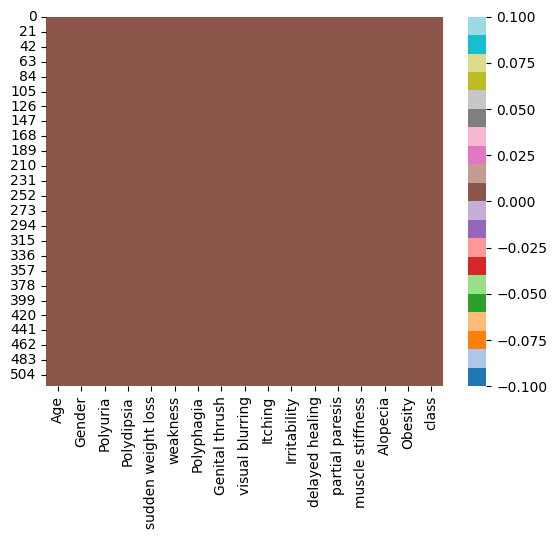

In [ ]:
seaborn.heatmap(data.isnull(), cmap = 'tab20')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
print("The number of occurences of the unique labels:\n", data["class"].value_counts())

The number of occurences of the unique labels:
 Positive    320
Negative    200
Name: class, dtype: int64


In [ ]:
print("Number of null values in the dataset for each features:")
data.isnull().sum()

Number of null values in the dataset for each features:


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
features = ["Age", "Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"]


In [ ]:
le = LabelEncoder()
for i in range(1, len(features)):
  data[features[i]] = le.fit_transform(data[features[i]])
data["encoded_class"] = le.fit_transform(data["class"])

In [ ]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,encoded_class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative,0


In [ ]:
data.sample(10)[["class", "encoded_class"]]

,class,encoded_class
431,Positive,1
210,Negative,0
445,Positive,1
115,Positive,1
43,Positive,1
428,Positive,1
137,Positive,1
284,Negative,0
102,Positive,1
265,Positive,1


In [ ]:
data = data.drop(["class"], axis=1)

In [ ]:
data_x = data.drop(['encoded_class'], axis=1)
data_y = data["encoded_class"]

In [ ]:
data_x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [ ]:
data_y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: encoded_class, Length: 520, dtype: int64

In [ ]:
print("The number of occurences of the unique labels in data_y:\n", data_y.value_counts())

The number of occurences of the unique labels in data_y:
 1    320
0    200
Name: encoded_class, dtype: int64


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state = 1, stratify = data_y)

In [ ]:
print("After splitting: ")
print("Training Data:: ", train_x.shape, train_y.shape)
print("Test Data: ", test_x.shape, test_y.shape)

After splitting: 
Training Data::  (416, 16) (416,)
Test Data:  (104, 16) (104,)


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train_x[features])
train_x[features] = min_max_scaler.transform(train_x[features])

In [ ]:
print("per-feature minimum after scaling:\n {}".format(train_x.min(axis=0)))
print()
print("per-feature maximum after scaling:\n {}".format(train_x.max(axis=0)))

per-feature minimum after scaling:
 Age                   0.0
Gender                0.0
Polyuria              0.0
Polydipsia            0.0
sudden weight loss    0.0
weakness              0.0
Polyphagia            0.0
Genital thrush        0.0
visual blurring       0.0
Itching               0.0
Irritability          0.0
delayed healing       0.0
partial paresis       0.0
muscle stiffness      0.0
Alopecia              0.0
Obesity               0.0
dtype: float64

per-feature maximum after scaling:
 Age                   1.0
Gender                1.0
Polyuria              1.0
Polydipsia            1.0
sudden weight loss    1.0
weakness              1.0
Polyphagia            1.0
Genital thrush        1.0
visual blurring       1.0
Itching               1.0
Irritability          1.0
delayed healing       1.0
partial paresis       1.0
muscle stiffness      1.0
Alopecia              1.0
Obesity               1.0
dtype: float64


In [ ]:
test_x[features] = min_max_scaler.transform(test_x[features])

In [ ]:
train_x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
118,0.662162,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
7,0.675676,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
143,0.500000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
123,0.418919,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
411,0.405405,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
421,0.608108,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
338,0.432432,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
476,0.364865,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
data_corr = data.corr()
data_corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,encoded_class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<Axes: >

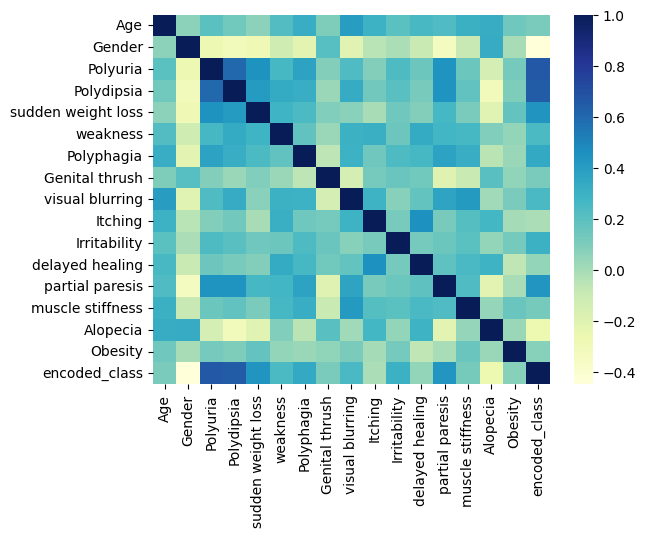

In [ ]:
seaborn.heatmap(data_corr, cmap = 'YlGnBu')

# Training Models

**Decision Tree Model**

In [ ]:
# Training the Decision Tree Model
dt = tree.DecisionTreeClassifier(min_samples_leaf=5)
dt = dt.fit(train_x, train_y)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Decision Tree:


[Text(0.7106481481481481, 0.9444444444444444, 'x[3] <= 0.5\ngini = 0.473\nsamples = 416\nvalue = [160, 256]'),
 Text(0.49537037037037035, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.44\nsamples = 229\nvalue = [154, 75]'),
 Text(0.32407407407407407, 0.7222222222222222, 'x[1] <= 0.5\ngini = 0.331\nsamples = 177\nvalue = [140, 37]'),
 Text(0.14814814814814814, 0.6111111111111112, 'x[14] <= 0.5\ngini = 0.459\nsamples = 42\nvalue = [15, 27]'),
 Text(0.07407407407407407, 0.5, 'x[0] <= 0.25\ngini = 0.271\nsamples = 31\nvalue = [5, 26]'),
 Text(0.037037037037037035, 0.3888888888888889, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.3888888888888889, 'x[0] <= 0.284\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.07407407407407407, 0.2777777777777778, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.14814814814814814, 0.2777777777777778, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.2222222222222222, 0.5, 'x[8] <= 0.5\ngini = 0.165\nsamples = 11\nvalu

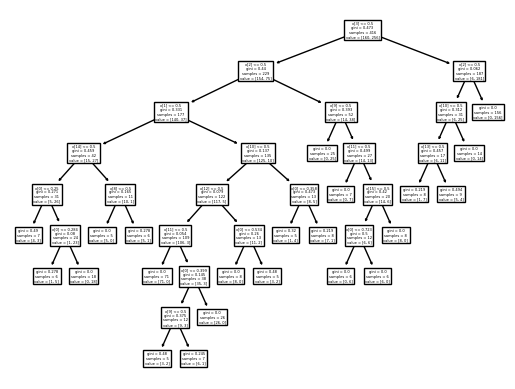

In [ ]:
print("Decision Tree:")
tree.plot_tree(dt)

In [ ]:
# Training Accuracy
accuracy = dt.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 95.91%


**Random Forest Model**

In [ ]:
random_forest = RandomForestClassifier(min_samples_leaf=3)
random_forest.fit(train_x, train_y)

RandomForestClassifier(min_samples_leaf=3)

In [ ]:
accuracy = random_forest.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 97.84%


**`Support Vector Machine (SVM) Model`**

In [ ]:
# Training the model
svm_c = svm.SVC()
svm_c.fit(train_x, train_y)

SVC()

In [ ]:
# Training Accuracy
accuracy = svm_c.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 98.32%


**`Logistic Regression Model`**

In [ ]:
# Training the model
logistic_reg = LogisticRegression(random_state=0).fit(train_x, train_y)

In [ ]:
# Training Accuracy
accuracy = logistic_reg.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 92.55%


**`Naive Bayes Classifier Model`**

In [ ]:
# Training the model
nbc = GaussianNB()
nbc.fit(train_x, train_y)

GaussianNB()

In [ ]:
# Training Accuracy
accuracy = nbc.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 88.7%


**`K-Nearest Neighbors`**

In [ ]:
# Training the Model
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [ ]:
# Training Accuracy
accuracy = knn.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 95.67%


# Testing the Model

**`Decision Tree Model`**

In [ ]:
# Test Accuracy
accuracy = dt.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 94.23%


**`Random Forest Model`**

In [ ]:
# Test Accuracy
accuracy = random_forest.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 96.15%


**`Support Vector Machine (SVM) Model`**

In [ ]:
# Test Accuracy
accuracy = svm_c.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 98.08%


**`Logistic Regression Model`**

In [ ]:
# Test Accuracy
accuracy = logistic_reg.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 96.15%


**`Naive Bayes Classifier Model`**

In [ ]:
# Test Accuracy
accuracy = nbc.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 93.27%


**`K-Nearest Neighbors Model`**

In [ ]:
# Test Accuracy
accuracy = knn.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 92.31%


# Analysis and Conclusion

**`Decision Tree Model`**

In [ ]:
predicted_labels = dt.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       1.00      0.91      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



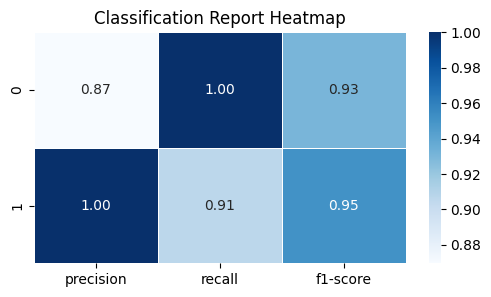

In [ ]:
# Visualizing classification report
class_report_df = pd.DataFrame(classification_report(test_y, predicted_labels, output_dict=True)).T

plt.figure(figsize=(6, 3))
seaborn.heatmap(class_report_df.iloc[:-3, :-1], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, yticklabels=['0', '1'])
plt.title('Classification Report Heatmap')
plt.show()

**`Random Forest Model`**

In [ ]:
predicted_labels = random_forest.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



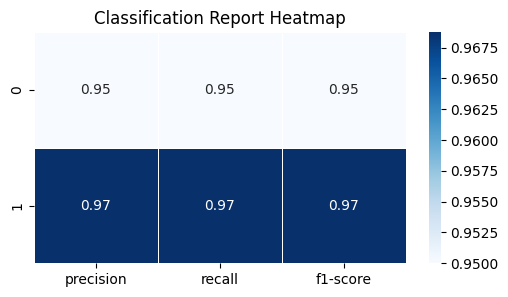

In [ ]:
# Visualizing classification report
class_report_df = pd.DataFrame(classification_report(test_y, predicted_labels, output_dict=True)).T

plt.figure(figsize=(6, 3))
seaborn.heatmap(class_report_df.iloc[:-3, :-1], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, yticklabels=['0', '1'])
plt.title('Classification Report Heatmap')
plt.show()

**`Support Vector Machine (SVM) Model`**

In [ ]:
predicted_labels = svm_c.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



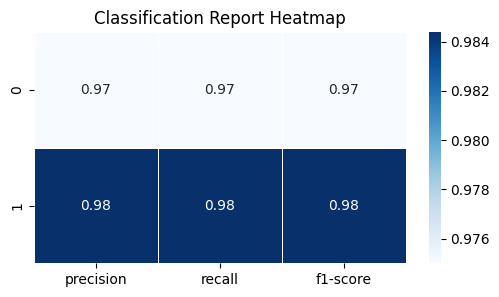

In [ ]:
# Visualizing classification report
class_report_df = pd.DataFrame(classification_report(test_y, predicted_labels, output_dict=True)).T

plt.figure(figsize=(6, 3))
seaborn.heatmap(class_report_df.iloc[:-3, :-1], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, yticklabels=['0', '1'])
plt.title('Classification Report Heatmap')
plt.show()

**`Logistic Regression Model`**

In [ ]:
predicted_labels = logistic_reg.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



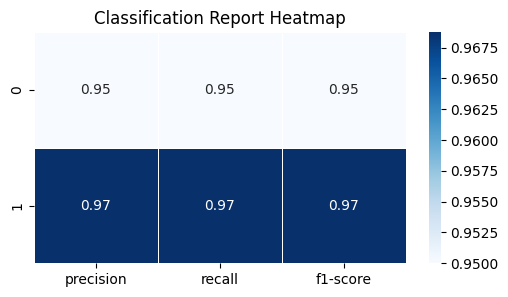

In [ ]:
# Visualizing classification report
class_report_df = pd.DataFrame(classification_report(test_y, predicted_labels, output_dict=True)).T

plt.figure(figsize=(6, 3))
seaborn.heatmap(class_report_df.iloc[:-3, :-1], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, yticklabels=['0', '1'])
plt.title('Classification Report Heatmap')
plt.show()

**`Naive Bayes Classifier Model`**

In [ ]:
predicted_labels = nbc.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.93      0.97      0.95        64

    accuracy                           0.93       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.93      0.93      0.93       104



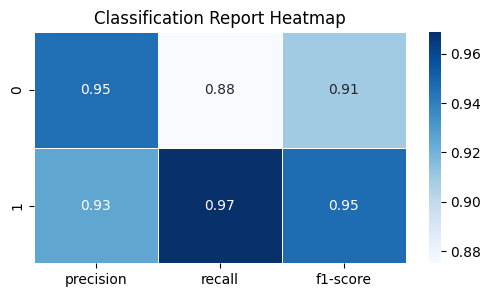

In [ ]:
# Visualizing classification report
class_report_df = pd.DataFrame(classification_report(test_y, predicted_labels, output_dict=True)).T

plt.figure(figsize=(6, 3))
seaborn.heatmap(class_report_df.iloc[:-3, :-1], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, yticklabels=['0', '1'])
plt.title('Classification Report Heatmap')
plt.show()

**`K-Nearest Neighbors Model`**

In [ ]:
predicted_labels = knn.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.97      0.91      0.94        64

    accuracy                           0.92       104
   macro avg       0.92      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



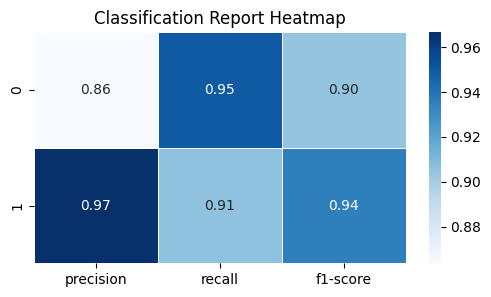

In [ ]:
# Visualizing classification report
class_report_df = pd.DataFrame(classification_report(test_y, predicted_labels, output_dict=True)).T

plt.figure(figsize=(6, 3))
seaborn.heatmap(class_report_df.iloc[:-3, :-1], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, yticklabels=['0', '1'])
plt.title('Classification Report Heatmap')
plt.show()